<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.

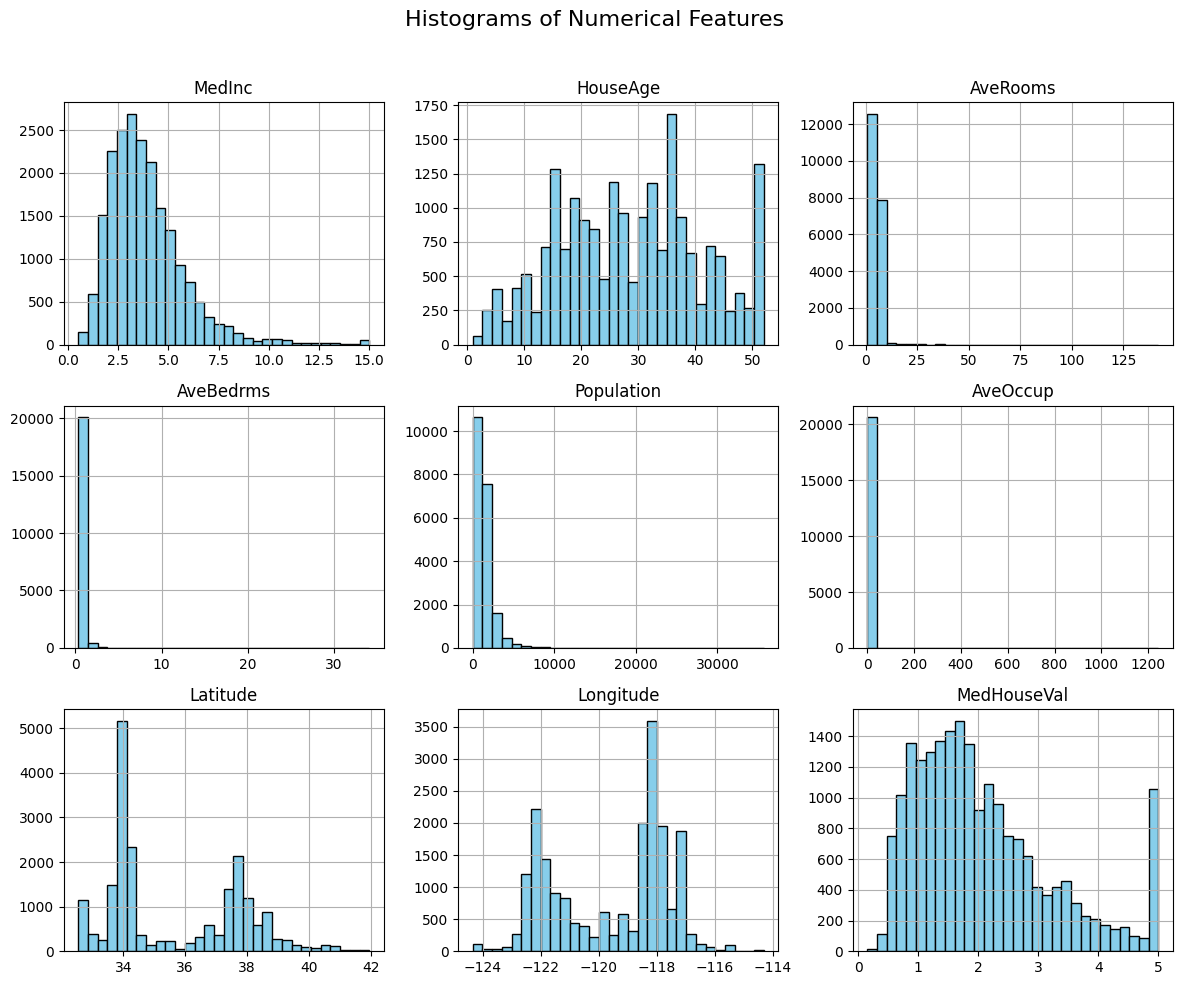

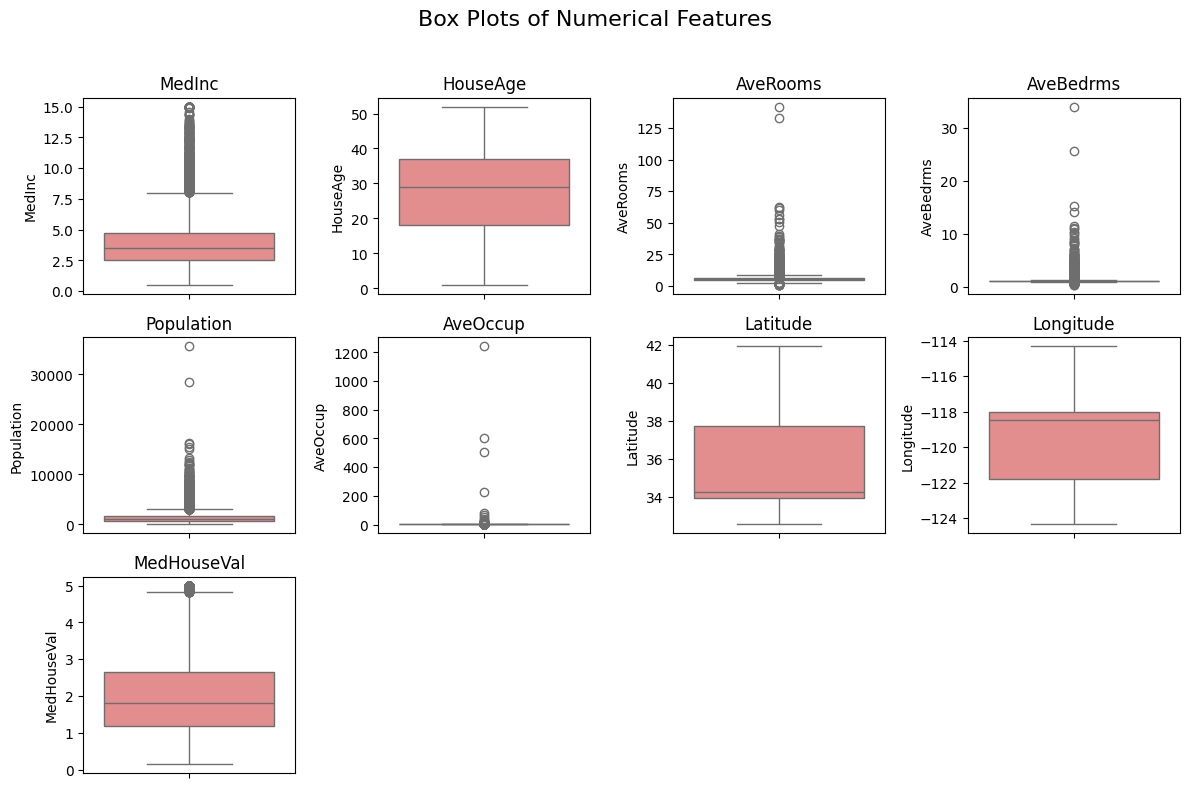

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

# Load California Housing Dataset
california = fetch_california_housing()
data = pd.DataFrame(california.data, columns=california.feature_names)

# Add the target variable (median house value)
data['MedHouseVal'] = california.target

# Display basic information about the dataset
print(data.info())
print(data.describe())

# Plot histograms for all numerical features
data.hist(figsize=(12, 10), bins=30, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Plot box plots for all numerical features to identify outliers
plt.figure(figsize=(12, 8))
for i, column in enumerate(data.columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=data[column], color='lightcoral')
    plt.title(column)
plt.suptitle('Box Plots of Numerical Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


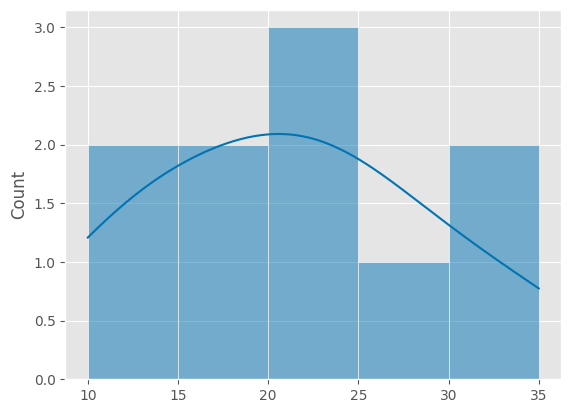

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = [10, 12, 15, 18, 20, 22, 24, 26, 30, 35]

# Plot histogram with KDE
sns.histplot(data, kde=True)

plt.show()

=== CALIFORNIA HOUSING DATASET ===
Shape: (20640, 9)

Features:
- MedInc
- HouseAge
- AveRooms
- AveBedrms
- Population
- AveOccup
- Latitude
- Longitude
- MEDV

=== DESCRIPTIVE STATISTICS ===
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude          MEDV  
count  20640.000000  20640.0000

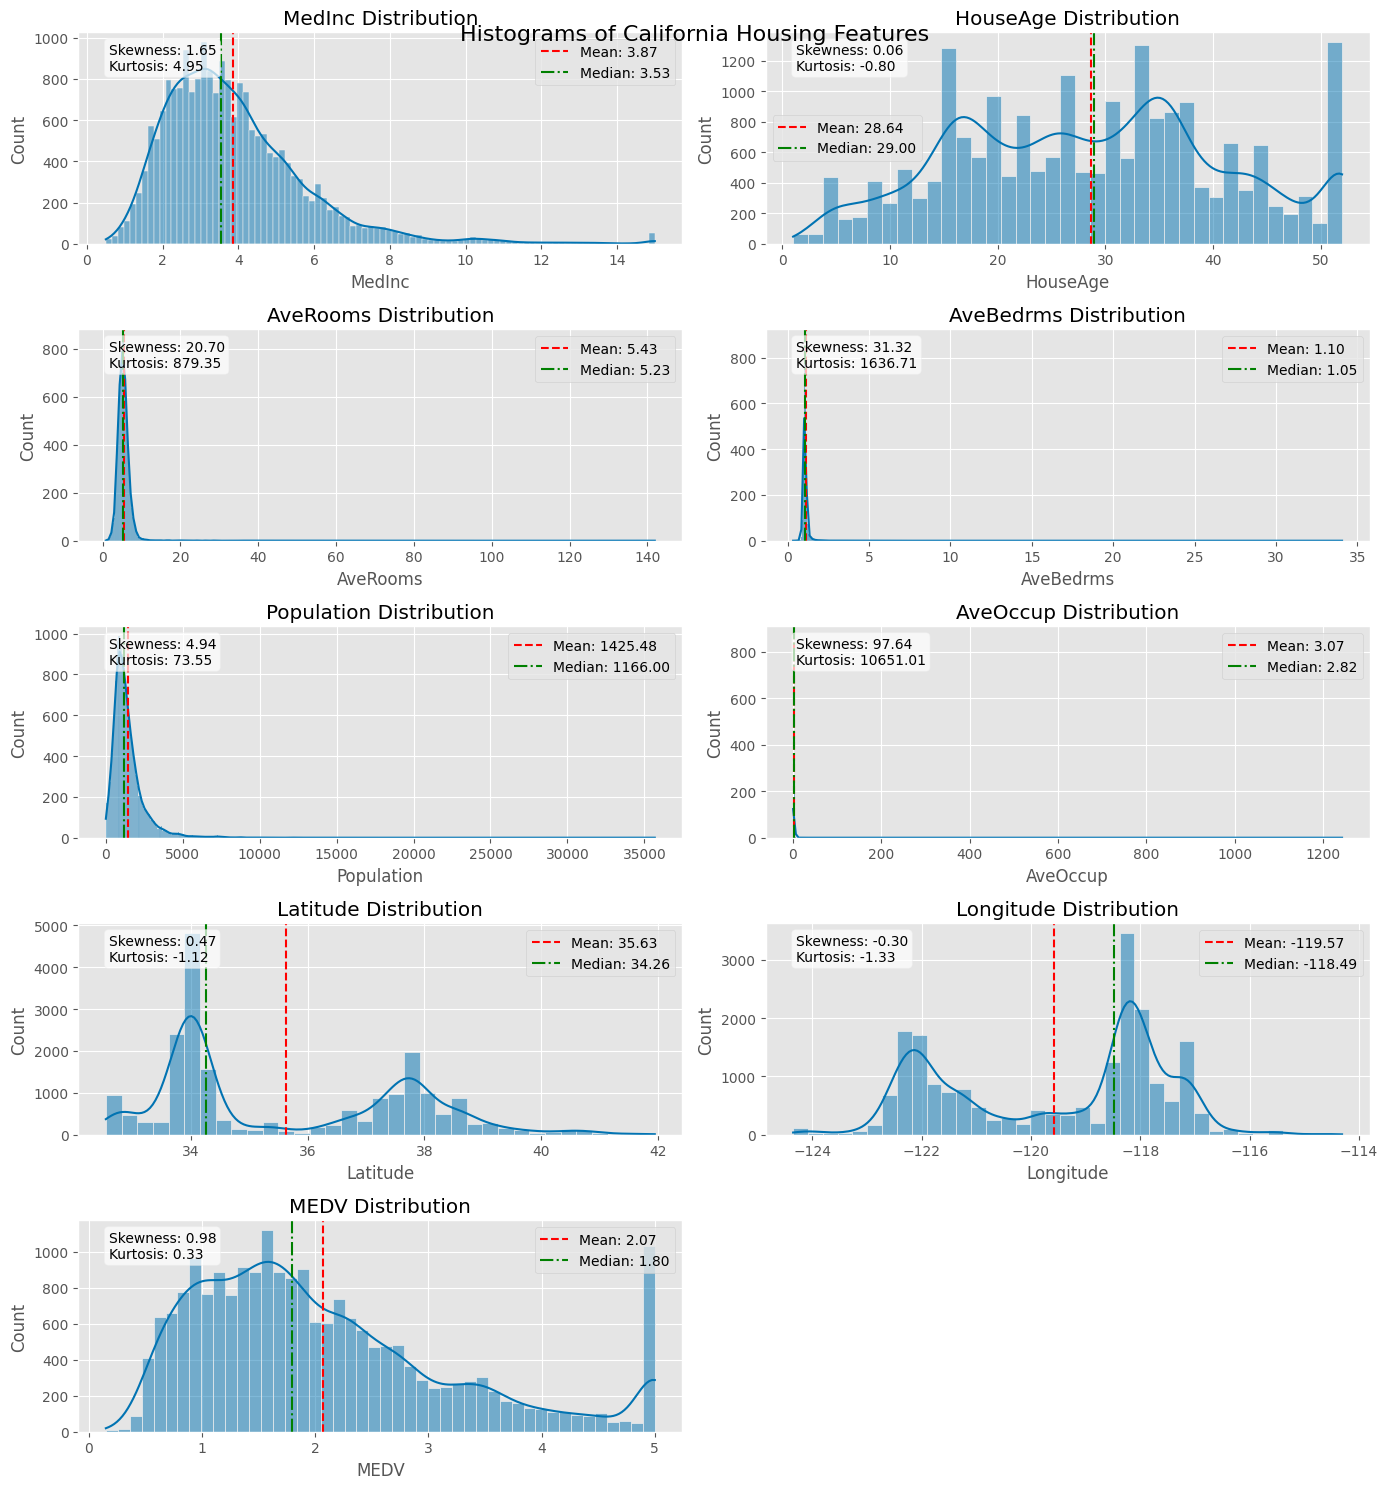

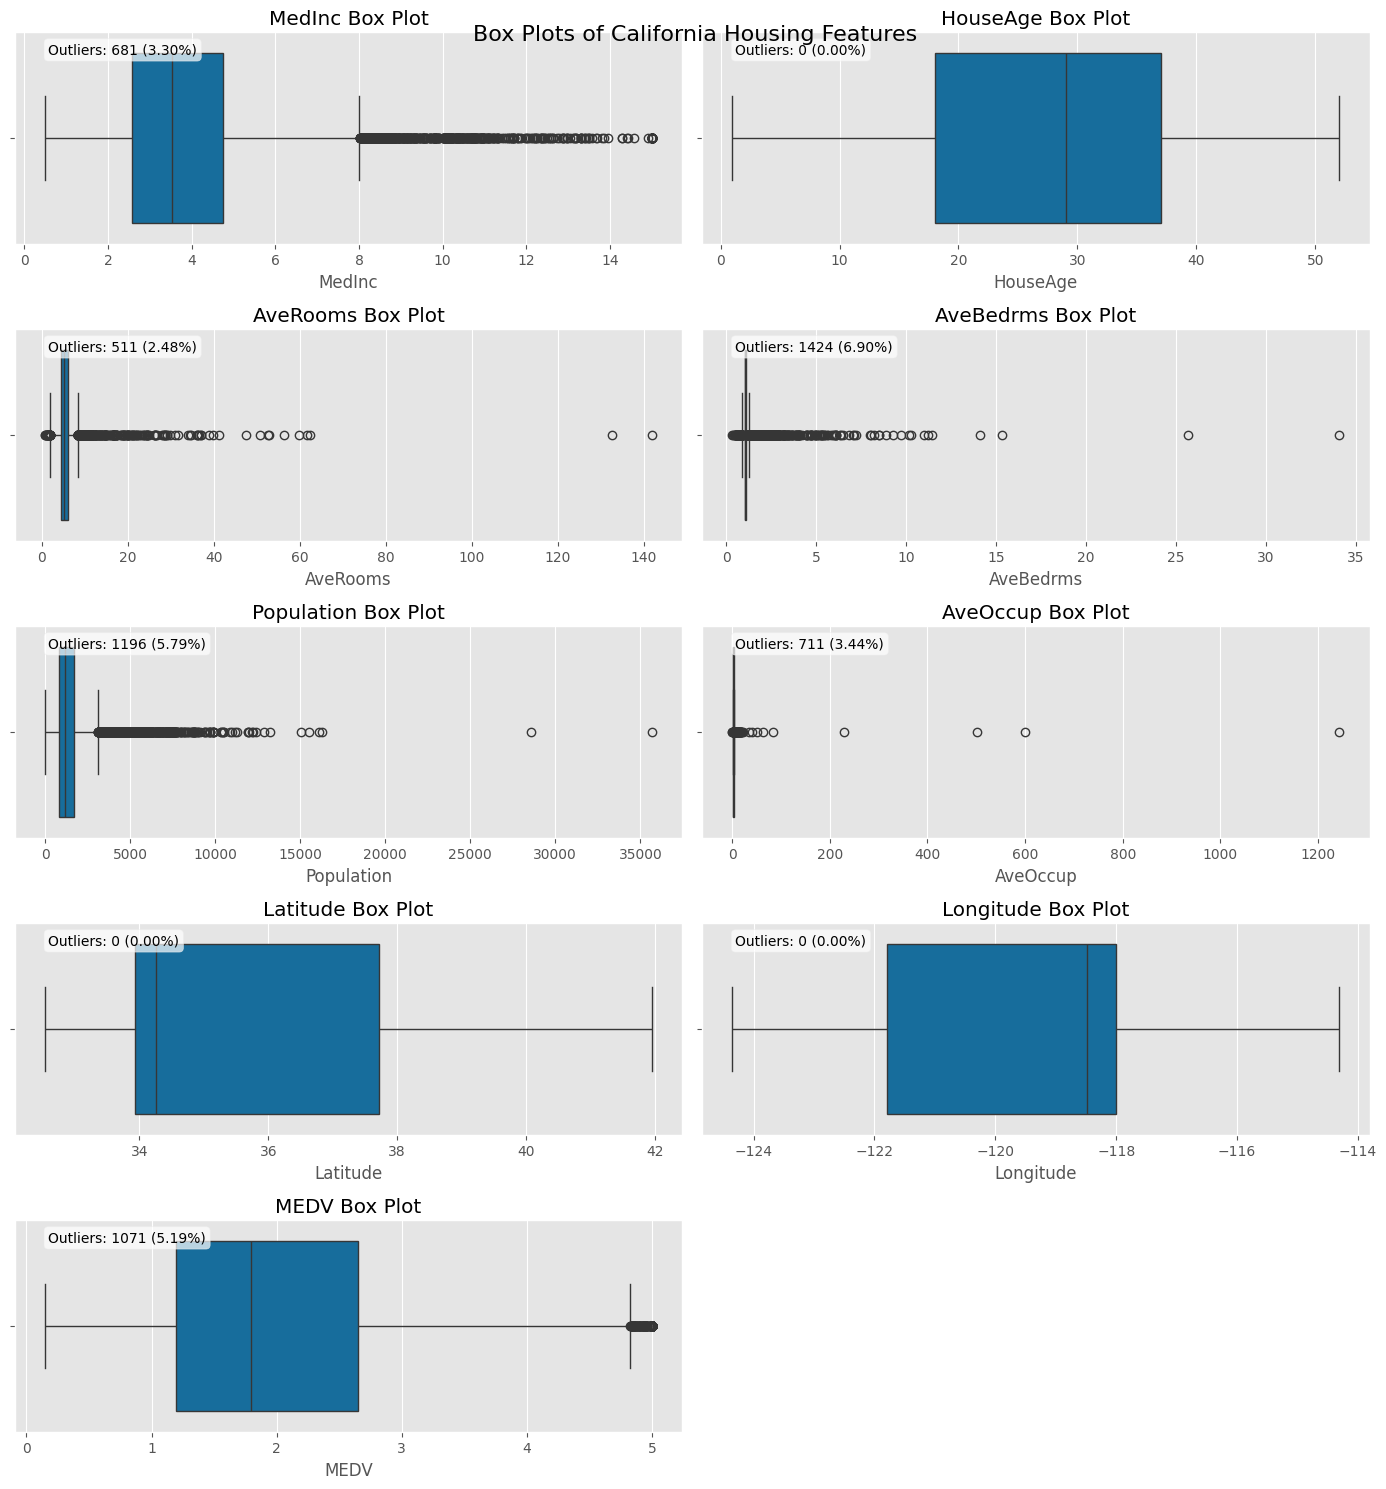

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

# Set the style for better visualizations
plt.style.use('ggplot')
sns.set_palette("colorblind")

def load_california_housing_data():
    """Load the California Housing dataset"""
    housing = fetch_california_housing()
    df = pd.DataFrame(housing.data, columns=housing.feature_names)
    df['MEDV'] = housing.target  # Add the target variable (median house value)
    return df

def analyze_distributions(df):
    """Create histograms and analyze the distribution of each numerical feature"""
    num_features = len(df.columns)
    fig, axes = plt.subplots(nrows=(num_features+1)//2, ncols=2, figsize=(14, 3*((num_features+1)//2)))
    axes = axes.flatten()
    
    for i, feature in enumerate(df.columns):
        # Histogram with KDE
        sns.histplot(df[feature], kde=True, ax=axes[i])
        
        # Calculate skewness and kurtosis
        skewness = df[feature].skew()
        kurtosis = df[feature].kurtosis()
        
        # Add mean and median lines
        mean_val = df[feature].mean()
        median_val = df[feature].median()
        axes[i].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
        axes[i].axvline(median_val, color='green', linestyle='-.', label=f'Median: {median_val:.2f}')
        
        # Add statistical info
        axes[i].set_title(f'{feature} Distribution')
        axes[i].text(0.05, 0.95, f'Skewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}', 
                transform=axes[i].transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
        axes[i].legend()
    
    # Remove any unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
        
    plt.tight_layout()
    return fig

def create_boxplots(df):
    """Create box plots for all numerical features and identify outliers"""
    num_features = len(df.columns)
    fig, axes = plt.subplots(nrows=(num_features+1)//2, ncols=2, figsize=(14, 3*((num_features+1)//2)))
    axes = axes.flatten()
    
    outliers_summary = {}
    
    for i, feature in enumerate(df.columns):
        # Create boxplot
        sns.boxplot(x=df[feature], ax=axes[i])
        
        # Calculate IQR for outlier detection
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
        outlier_percentage = (len(outliers) / len(df)) * 100
        
        # Store outlier information
        outliers_summary[feature] = {
            'count': len(outliers),
            'percentage': outlier_percentage,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'min_outlier': outliers.min() if not outliers.empty else None,
            'max_outlier': outliers.max() if not outliers.empty else None
        }
        
        # Add title with outlier information
        axes[i].set_title(f'{feature} Box Plot')
        axes[i].text(0.05, 0.95, f'Outliers: {len(outliers)} ({outlier_percentage:.2f}%)', 
                transform=axes[i].transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
    
    # Remove any unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
        
    plt.tight_layout()
    return fig, outliers_summary

def print_outlier_summary(outliers_summary):
    """Print a summary of outliers for each feature"""
    print("\n=== OUTLIER SUMMARY ===")
    print("Feature | Count | % | Range")
    print("-" * 50)
    
    for feature, stats in outliers_summary.items():
        if stats['count'] > 0:
            print(f"{feature:8} | {stats['count']:5} | {stats['percentage']:5.2f}% | " + 
                  f"[{stats['min_outlier']:.2f} ... {stats['max_outlier']:.2f}]")
        else:
            print(f"{feature:8} | {stats['count']:5} | {stats['percentage']:5.2f}% | None")
    
    print("\nFeatures with the most outliers:")
    sorted_features = sorted(outliers_summary.items(), key=lambda x: x[1]['percentage'], reverse=True)
    for feature, stats in sorted_features[:3]:
        print(f"- {feature}: {stats['percentage']:.2f}% ({stats['count']} points)")

def main():
    # Load the dataset
    df = load_california_housing_data()
    
    # Display basic information about the dataset
    print("=== CALIFORNIA HOUSING DATASET ===")
    print(f"Shape: {df.shape}")
    print("\nFeatures:")
    for feature in df.columns:
        print(f"- {feature}")
    
    print("\n=== DESCRIPTIVE STATISTICS ===")
    print(df.describe())
    
    # Analyze distributions
    hist_fig = analyze_distributions(df)
    hist_fig.suptitle("Histograms of California Housing Features", fontsize=16)
    hist_fig.savefig("california_housing_histograms.png", dpi=300, bbox_inches='tight')
    
    # Create boxplots and identify outliers
    box_fig, outliers_summary = create_boxplots(df)
    box_fig.suptitle("Box Plots of California Housing Features", fontsize=16)
    box_fig.savefig("california_housing_boxplots.png", dpi=300, bbox_inches='tight')
    
    # Print outlier summary
    print_outlier_summary(outliers_summary)
    
    print("\nAnalysis complete! Visualization files saved.")
    plt.show()

if __name__ == "__main__":
    main()

=== CALIFORNIA HOUSING DATASET ===
Shape: (20640, 9)

Features:
- MedInc
- HouseAge
- AveRooms
- AveBedrms
- Population
- AveOccup
- Latitude
- Longitude
- MEDV

=== DESCRIPTIVE STATISTICS ===
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude          MEDV  
count  20640.000000  20640.0000

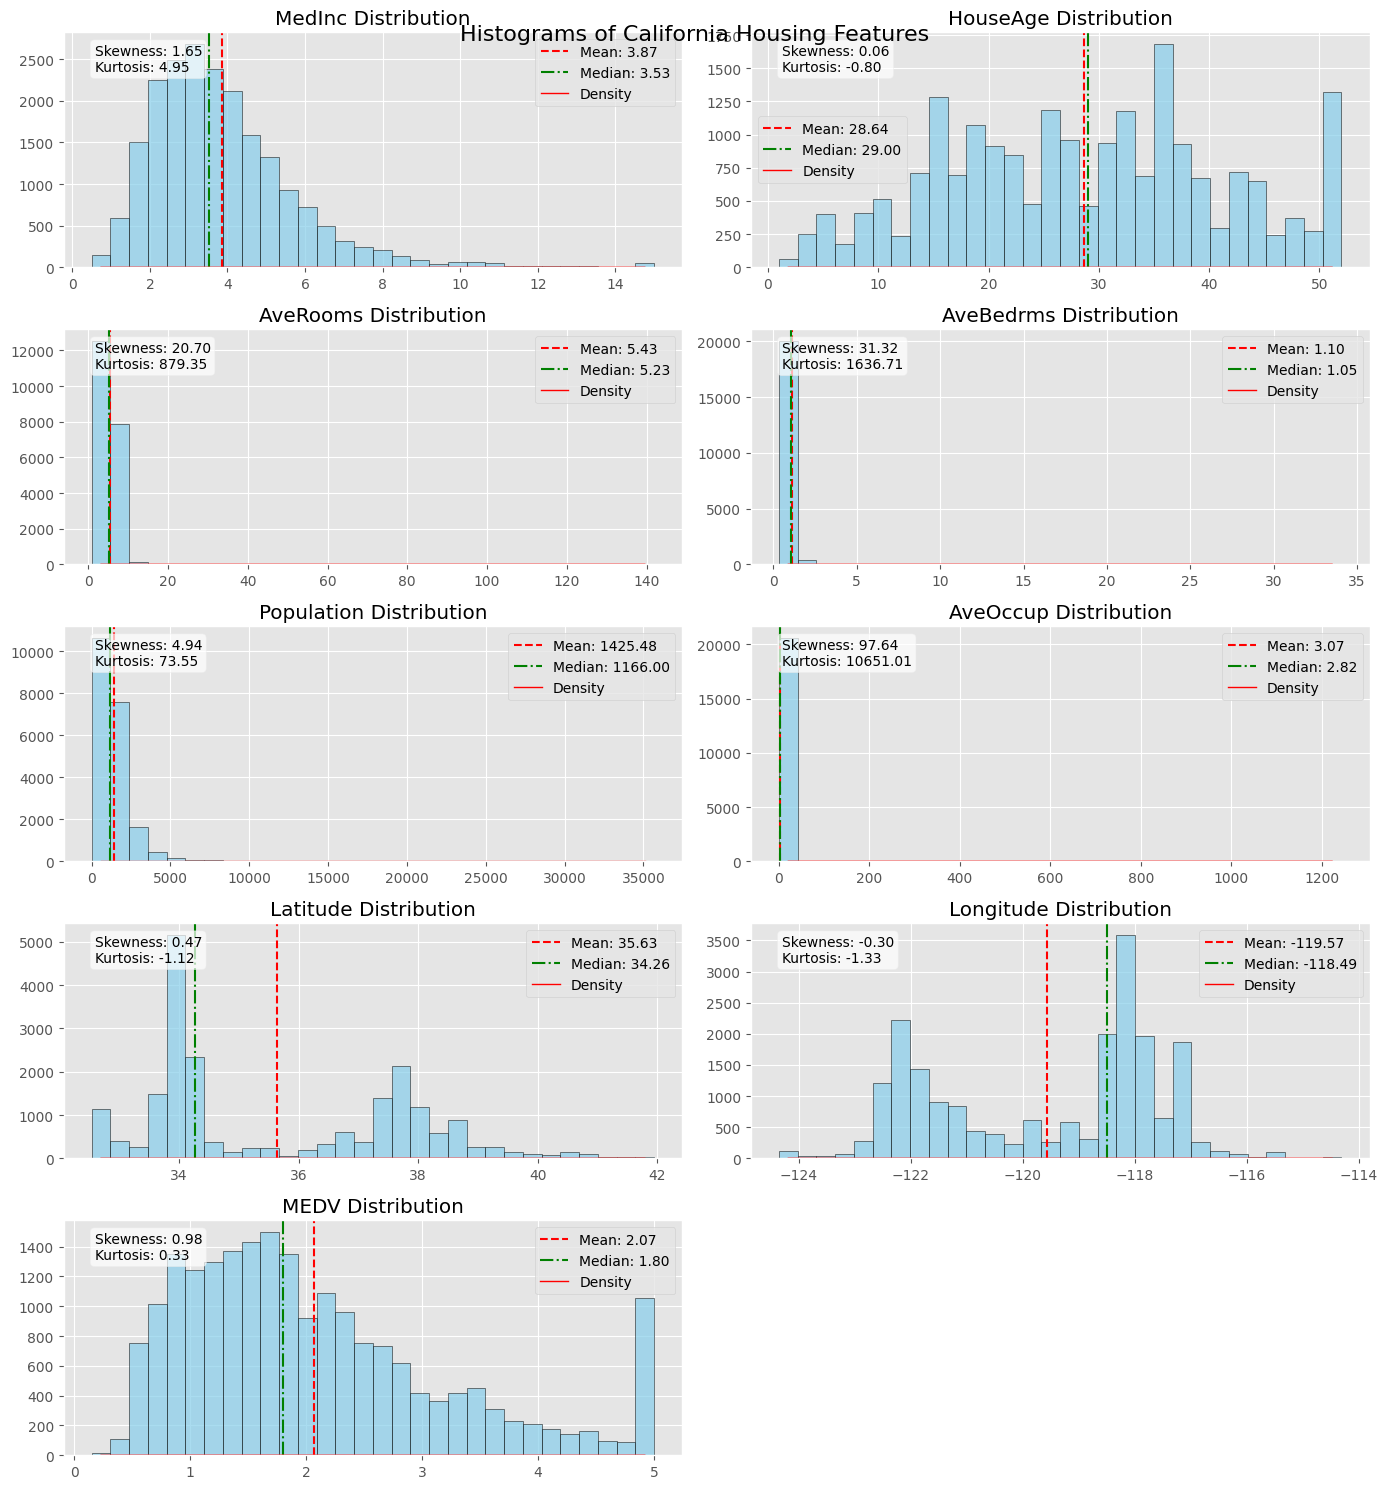

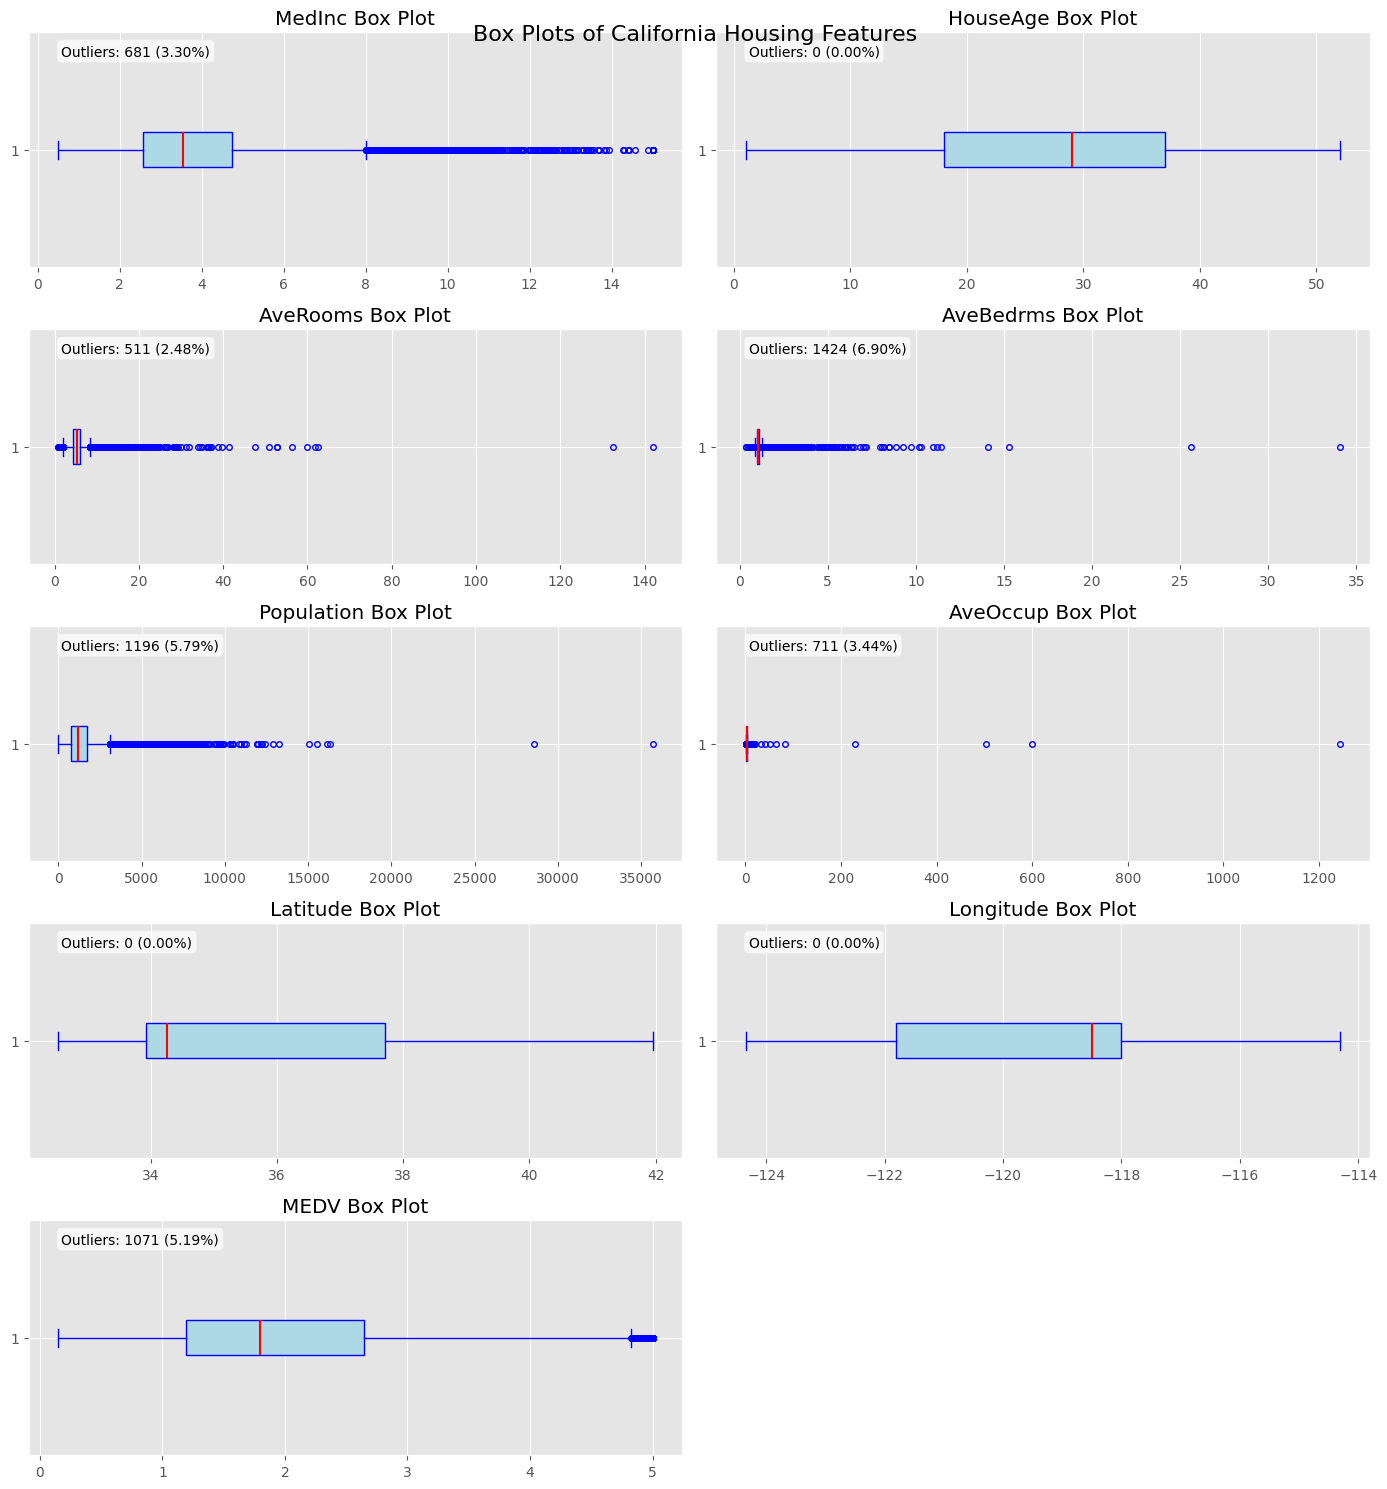

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

def load_california_housing_data():
    """Load the California Housing dataset"""
    housing = fetch_california_housing()
    df = pd.DataFrame(housing.data, columns=housing.feature_names)
    df['MEDV'] = housing.target  # Add the target variable (median house value)
    return df

def analyze_distributions(df):
    """Create histograms and analyze the distribution of each numerical feature using matplotlib only"""
    num_features = len(df.columns)
    fig, axes = plt.subplots(nrows=(num_features+1)//2, ncols=2, figsize=(14, 3*((num_features+1)//2)))
    axes = axes.flatten()
    
    for i, feature in enumerate(df.columns):
        # Create histogram
        n, bins, patches = axes[i].hist(df[feature], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        
        # Calculate skewness and kurtosis
        skewness = df[feature].skew()
        kurtosis = df[feature].kurtosis()
        
        # Add mean and median lines
        mean_val = df[feature].mean()
        median_val = df[feature].median()
        axes[i].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
        axes[i].axvline(median_val, color='green', linestyle='-.', label=f'Median: {median_val:.2f}')
        
        # Add distribution curve (using normalized histogram data)
        if len(bins) > 1:
            bin_centers = 0.5 * (bins[1:] + bins[:-1])
            bin_width = bins[1] - bins[0]
            y = n / (len(df[feature]) * bin_width)  # Normalize to get probability density
            axes[i].plot(bin_centers, y, 'r-', linewidth=1, label='Density')
        
        # Add statistical info
        axes[i].set_title(f'{feature} Distribution')
        axes[i].text(0.05, 0.95, f'Skewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}', 
                transform=axes[i].transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
        axes[i].legend()
    
    # Remove any unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
        
    plt.tight_layout()
    return fig

def create_boxplots(df):
    """Create box plots for all numerical features and identify outliers using matplotlib only"""
    num_features = len(df.columns)
    fig, axes = plt.subplots(nrows=(num_features+1)//2, ncols=2, figsize=(14, 3*((num_features+1)//2)))
    axes = axes.flatten()
    
    outliers_summary = {}
    
    for i, feature in enumerate(df.columns):
        # Create boxplot
        boxplot = axes[i].boxplot(df[feature], vert=False, patch_artist=True)
        
        # Customize boxplot appearance
        for box in boxplot['boxes']:
            box.set(color='blue', linewidth=1)
            box.set(facecolor='lightblue')
        for whisker in boxplot['whiskers']:
            whisker.set(color='blue', linewidth=1)
        for cap in boxplot['caps']:
            cap.set(color='blue', linewidth=1)
        for median in boxplot['medians']:
            median.set(color='red', linewidth=1.5)
        for flier in boxplot['fliers']:
            flier.set(marker='o', markerfacecolor='none', markeredgecolor='blue', markersize=4)
        
        # Calculate IQR for outlier detection
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
        outlier_percentage = (len(outliers) / len(df)) * 100
        
        # Store outlier information
        outliers_summary[feature] = {
            'count': len(outliers),
            'percentage': outlier_percentage,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'min_outlier': outliers.min() if not outliers.empty else None,
            'max_outlier': outliers.max() if not outliers.empty else None
        }
        
        # Add title with outlier information
        axes[i].set_title(f'{feature} Box Plot')
        axes[i].text(0.05, 0.95, f'Outliers: {len(outliers)} ({outlier_percentage:.2f}%)', 
                transform=axes[i].transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
    
    # Remove any unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
        
    plt.tight_layout()
    return fig, outliers_summary

def print_outlier_summary(outliers_summary):
    """Print a summary of outliers for each feature"""
    print("\n=== OUTLIER SUMMARY ===")
    print("Feature | Count | % | Range")
    print("-" * 50)
    
    for feature, stats in outliers_summary.items():
        if stats['count'] > 0:
            print(f"{feature:8} | {stats['count']:5} | {stats['percentage']:5.2f}% | " + 
                  f"[{stats['min_outlier']:.2f} ... {stats['max_outlier']:.2f}]")
        else:
            print(f"{feature:8} | {stats['count']:5} | {stats['percentage']:5.2f}% | None")
    
    print("\nFeatures with the most outliers:")
    sorted_features = sorted(outliers_summary.items(), key=lambda x: x[1]['percentage'], reverse=True)
    for feature, stats in sorted_features[:3]:
        print(f"- {feature}: {stats['percentage']:.2f}% ({stats['count']} points)")

def main():
    # Load the dataset
    df = load_california_housing_data()
    
    # Display basic information about the dataset
    print("=== CALIFORNIA HOUSING DATASET ===")
    print(f"Shape: {df.shape}")
    print("\nFeatures:")
    for feature in df.columns:
        print(f"- {feature}")
    
    print("\n=== DESCRIPTIVE STATISTICS ===")
    print(df.describe())
    
    # Analyze distributions
    hist_fig = analyze_distributions(df)
    hist_fig.suptitle("Histograms of California Housing Features", fontsize=16)
    hist_fig.savefig("california_housing_histograms.png", dpi=300, bbox_inches='tight')
    
    # Create boxplots and identify outliers
    box_fig, outliers_summary = create_boxplots(df)
    box_fig.suptitle("Box Plots of California Housing Features", fontsize=16)
    box_fig.savefig("california_housing_boxplots.png", dpi=300, bbox_inches='tight')
    
    # Print outlier summary
    print_outlier_summary(outliers_summary)
    
    print("\nAnalysis complete! Visualization files saved.")
    plt.show()

if __name__ == "__main__":
    main()

Correlation Matrix:
              MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   

            Latitude  Longitude  
MedInc     -0.079809  -0.015176  
HouseAge    0.011173  -0.108197  
AveRooms    0.106389  -0.027540  
AveBedrms   0.069721   0.013344  
Population -0.108785   0.099773  
AveOccup    0.002366   0.002476  
Latitude    1.000000  -0.924664  
Longitude  -0.

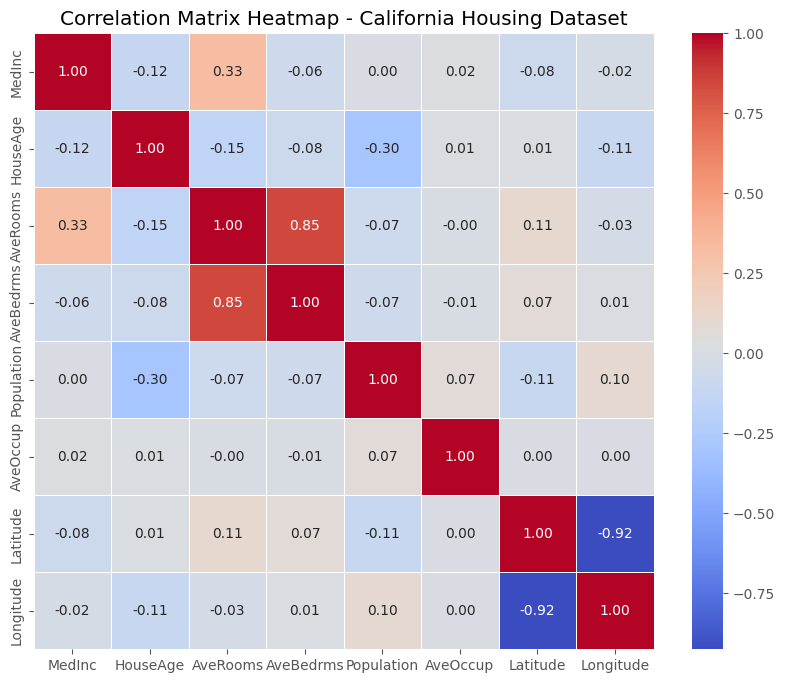

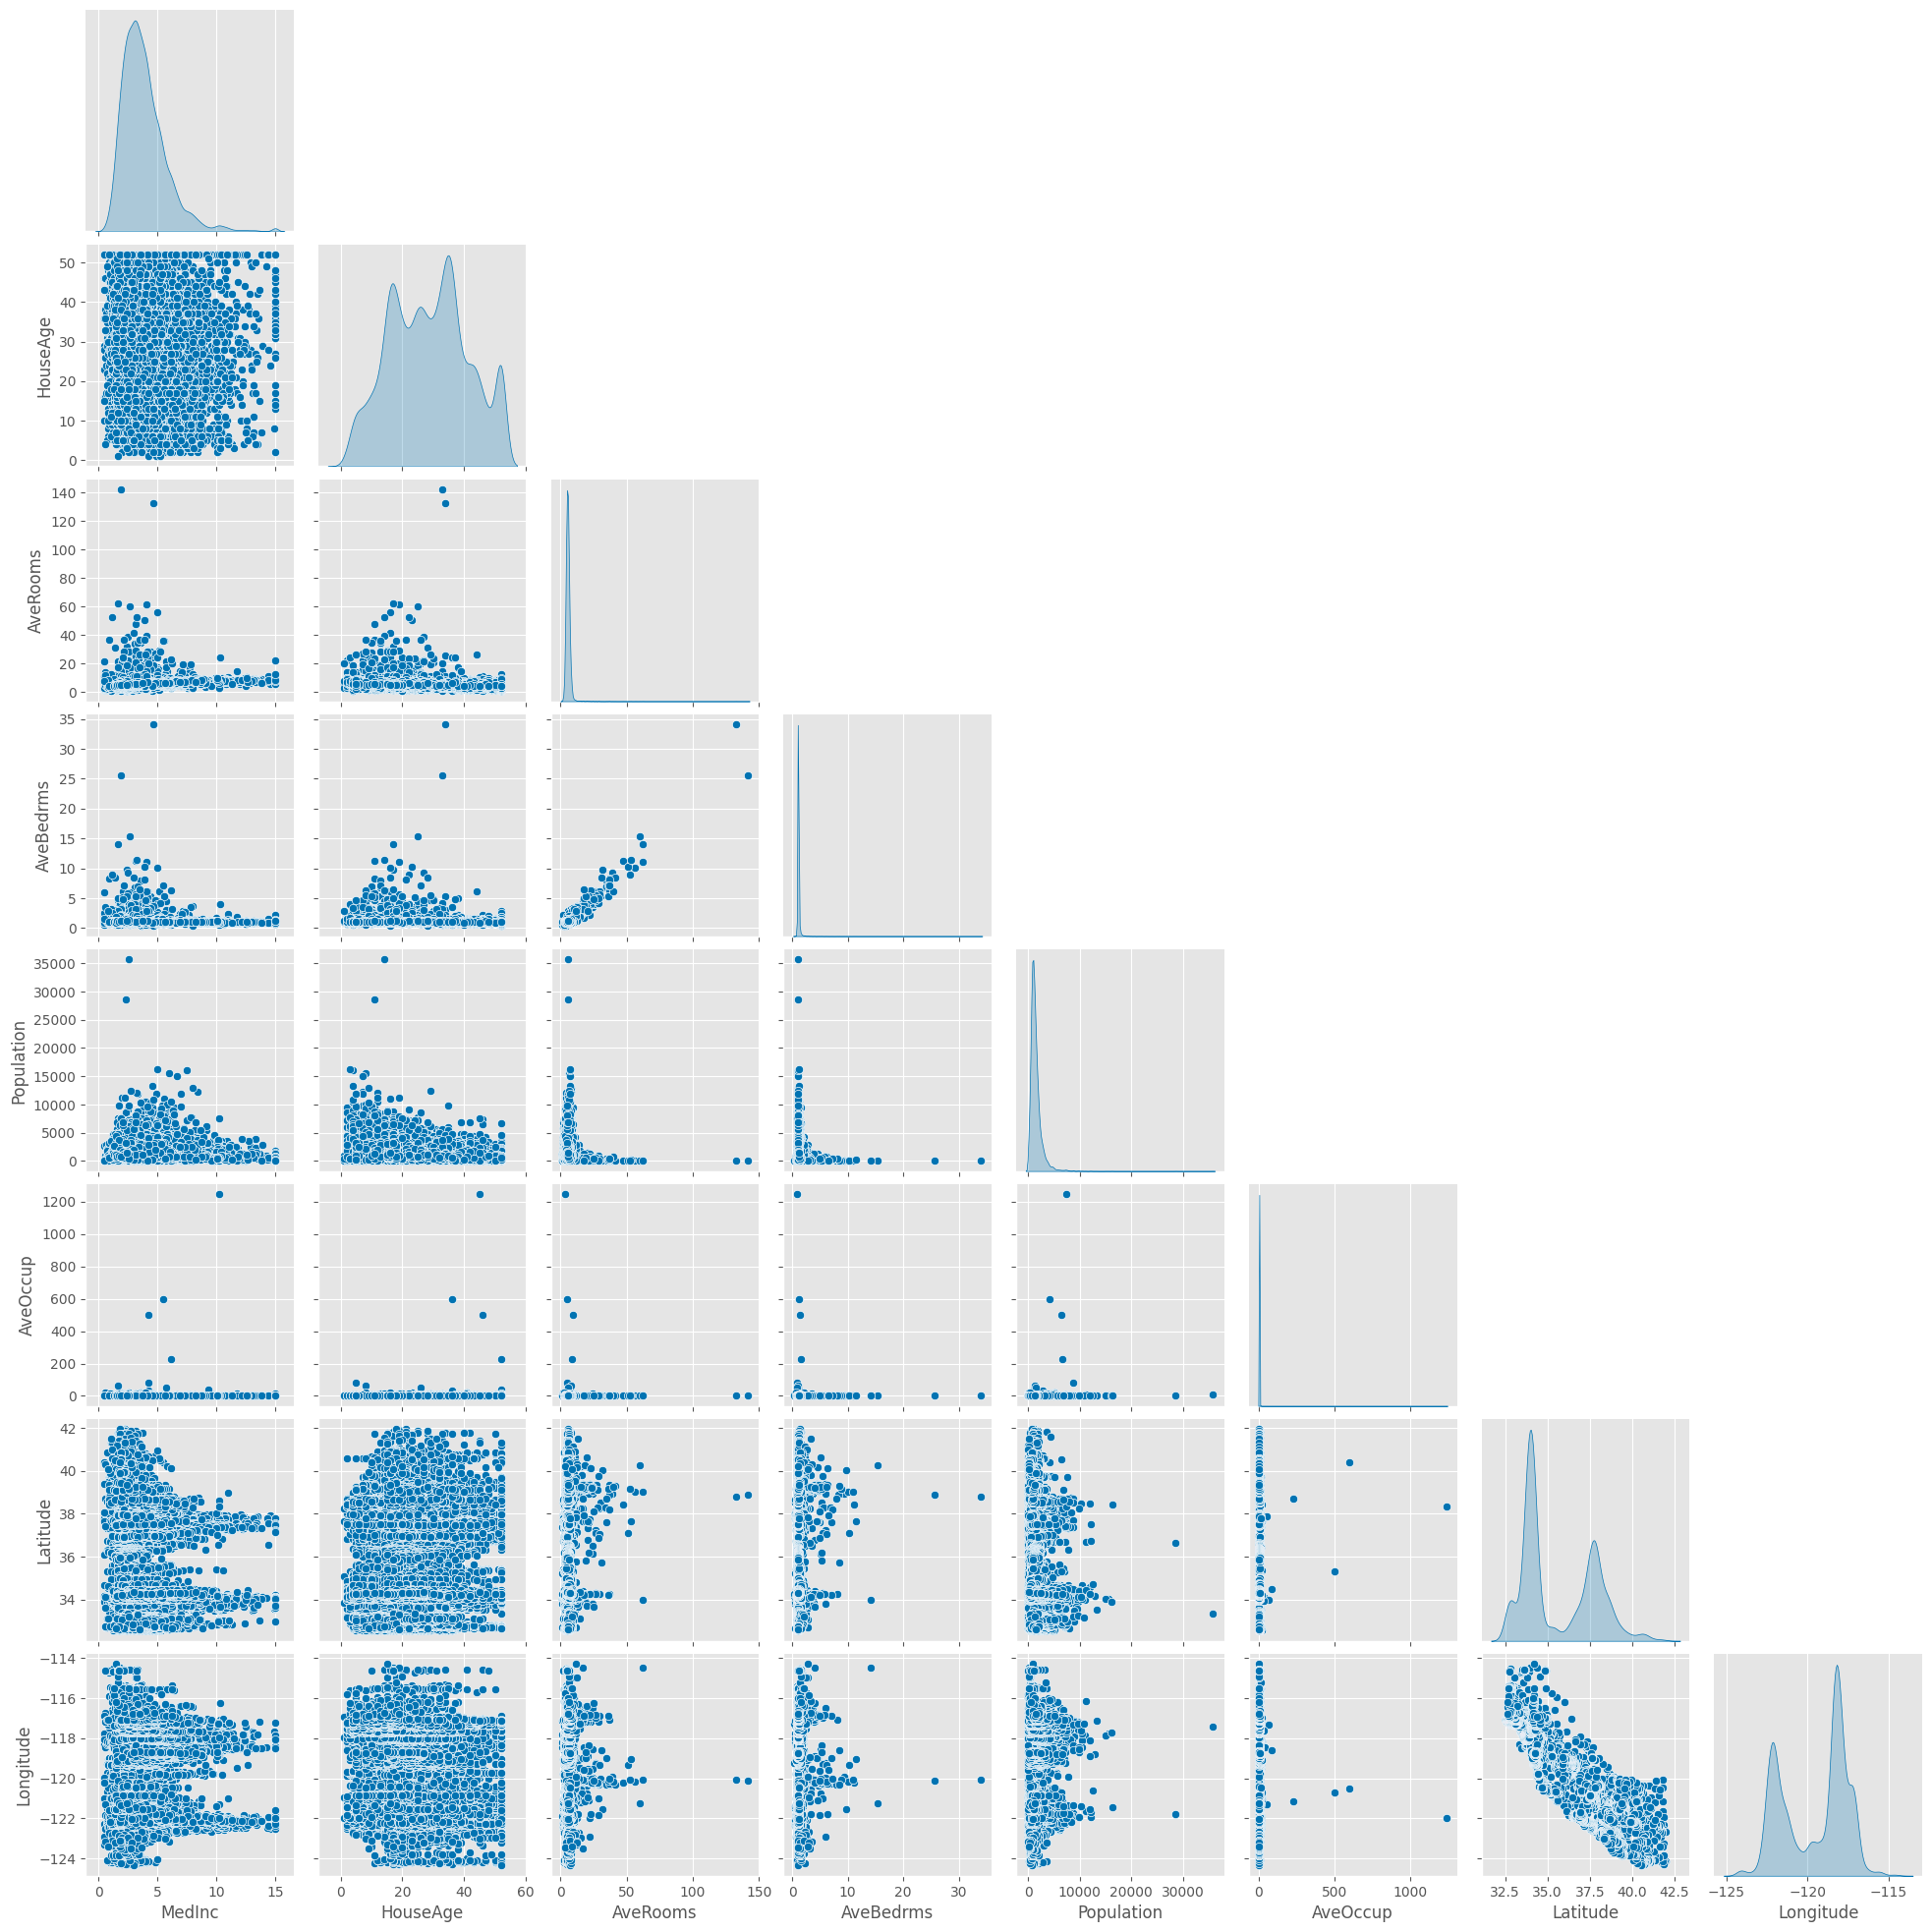

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Load California Housing dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Compute the correlation matrix
correlation_matrix = df.corr()

# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Set the figure size
plt.figure(figsize=(10, 8))

# Create a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Title for the heatmap
plt.title("Correlation Matrix Heatmap - California Housing Dataset")
plt.show()

# Create a pair plot for pairwise relationships
sns.pairplot(df, corner=True, diag_kind="kde")  # corner=True avoids duplicate plots, KDE for smooth histograms

# Show the pair plot
plt.show()

Explained Variance Ratio: [0.72962445 0.22850762]


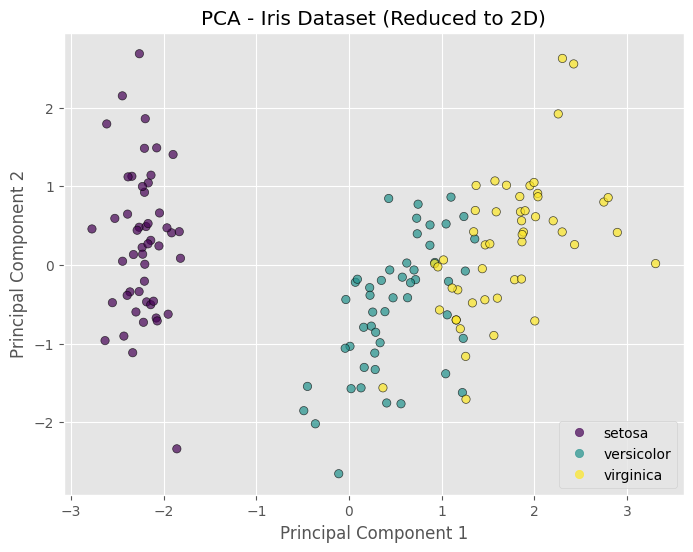

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)  # Convert to DataFrame
df['target'] = iris.target  # Add target labels
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})  # Map labels to names

# Standardize the features (PCA works best with standardized data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.iloc[:, :-2])  # Exclude target columns

# Apply PCA to reduce dimensions from 4D to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for PCA results
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
# df_pca['species'] = df['species']  # Add species labels for visualization

# Explained variance ratio (how much variance is captured by each component)
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance}")

# Plot PCA results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df['target'], cmap='viridis', edgecolor='k', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - Iris Dataset (Reduced to 2D)")
plt.legend(handles=scatter.legend_elements()[0], labels=list(iris.target_names))
plt.grid(True)
plt.show()

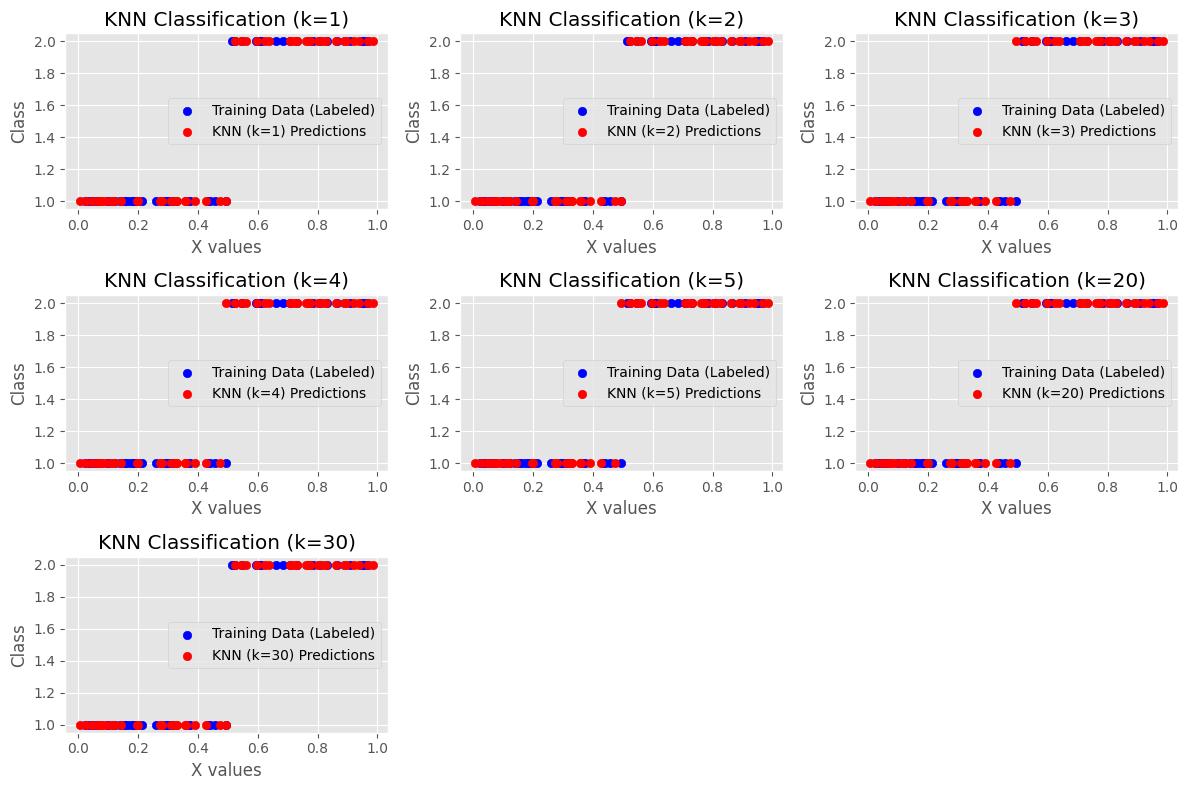

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Generate 100 random values in the range (0,1]
np.random.seed(42)  # For reproducibility
X = np.random.rand(100).reshape(-1, 1)  # Generate 100 random values

# Step 2: Label the first 50 points
y = np.array([1 if x <= 0.5 else 2 for x in X[:50]])  # Class labels for first 50

# Step 3: Train KNN classifier for different values of k
X_train, y_train = X[:50], y  # First 50 as training data
X_test = X[50:]  # Remaining 50 as test data

# Values of k to test
k_values = [1, 2, 3, 4, 5, 20, 30]

# Step 4: Classify the remaining points using KNN for each k
plt.figure(figsize=(12, 8))

for i, k in enumerate(k_values, 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)  # Train model
    y_pred = knn.predict(X_test)  # Predict on test data

    # Step 5: Plot classification results
    plt.subplot(3, 3, i)
    plt.scatter(X_train, y_train, color='blue', label="Training Data (Labeled)")
    plt.scatter(X_test, y_pred, color='red', label=f"KNN (k={k}) Predictions")
    plt.xlabel("X values")
    plt.ylabel("Class")
    plt.title(f"KNN Classification (k={k})")
    plt.legend()

plt.tight_layout()
plt.show()

Results for k=1:
['Class1' 'Class2' 'Class2' 'Class1' 'Class1' 'Class2' 'Class1' 'Class2'
 'Class2' 'Class2' 'Class1' 'Class2' 'Class1' 'Class2' 'Class2' 'Class1'
 'Class2' 'Class2' 'Class1' 'Class1' 'Class1' 'Class1' 'Class1' 'Class2'
 'Class1' 'Class1' 'Class2' 'Class1' 'Class2' 'Class1' 'Class1' 'Class2'
 'Class2' 'Class2' 'Class2' 'Class2' 'Class1' 'Class1' 'Class2' 'Class2'
 'Class2' 'Class1' 'Class1' 'Class2' 'Class1' 'Class2' 'Class2' 'Class1'
 'Class2' 'Class2']


Results for k=2:
['Class1' 'Class2' 'Class2' 'Class1' 'Class1' 'Class2' 'Class1' 'Class2'
 'Class2' 'Class2' 'Class1' 'Class2' 'Class1' 'Class2' 'Class2' 'Class1'
 'Class2' 'Class2' 'Class1' 'Class1' 'Class1' 'Class1' 'Class1' 'Class2'
 'Class1' 'Class1' 'Class2' 'Class1' 'Class2' 'Class1' 'Class1' 'Class2'
 'Class2' 'Class2' 'Class2' 'Class2' 'Class1' 'Class1' 'Class2' 'Class2'
 'Class2' 'Class1' 'Class1' 'Class2' 'Class1' 'Class2' 'Class2' 'Class1'
 'Class2' 'Class2']


Results for k=3:
['Class2' 'Class2' 'Class2' '

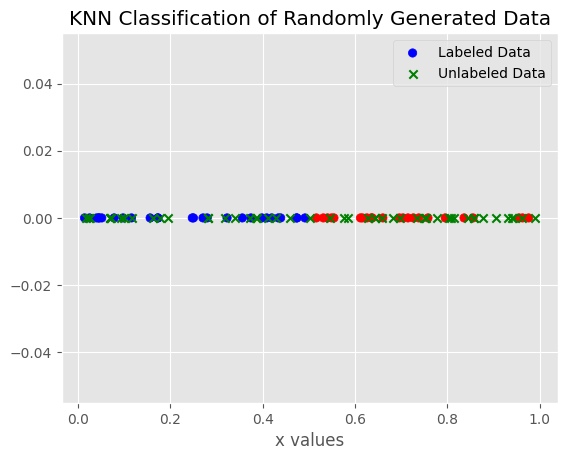

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Generate 100 random values in the range [0,1]
x_values = np.random.rand(100).reshape(-1, 1)

# Label the first 50 points
labels = np.array(["Class1" if x <= 0.5 else "Class2" for x in x_values[:50]])

# Train KNN and classify remaining points
k_values = [1, 2, 3, 4, 5, 20, 30]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_values[:50], labels)
    predicted_labels = knn.predict(x_values[50:])
    
    # Display results
    print(f"Results for k={k}:")
    print(predicted_labels)
    print("\n")

# Visualize classification
plt.scatter(x_values[:50], np.zeros(50), c=["blue" if x <= 0.5 else "red" for x in x_values[:50]], label='Labeled Data')
plt.scatter(x_values[50:], np.zeros(50), c='green', marker='x', label='Unlabeled Data')
plt.xlabel("x values")
plt.title("KNN Classification of Randomly Generated Data")
plt.legend()
plt.show()



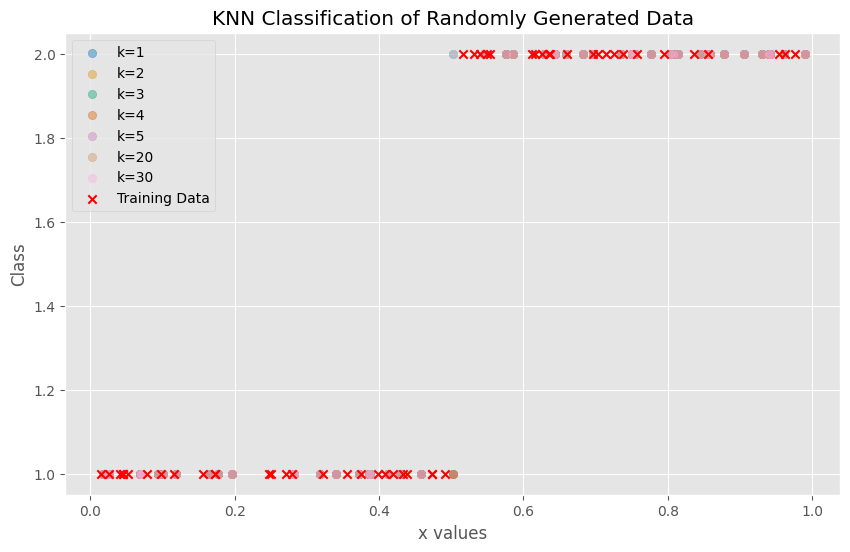

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Generate 100 random values in the range [0,1]
x_values = np.random.rand(100).reshape(-1, 1)

# Step 2: Label the first 50 points based on the given condition
labels = np.array([1 if x <= 0.5 else 2 for x in x_values[:50]])

# Step 3: Prepare training and testing datasets
x_train = x_values[:50]
y_train = labels
x_test = x_values[50:]

# Step 4: Perform KNN classification for different values of k
k_values = [1, 2, 3, 4, 5, 20, 30]

plt.figure(figsize=(10, 6))
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    predictions = knn.predict(x_test)
    
    # Step 5: Visualize the classification
    plt.scatter(x_test, predictions, label=f'k={k}', alpha=0.4)
    
plt.scatter(x_train, y_train, c='red', label='Training Data', marker='x')
plt.xlabel('x values')
plt.ylabel('Class')
plt.title('KNN Classification of Randomly Generated Data')
plt.legend()
plt.show()


In [22]:
error_rate = []

for i in k_values:

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_preds = knn.predict(x_test)
    error_rate.append(np.mean(y_pred != y_train))

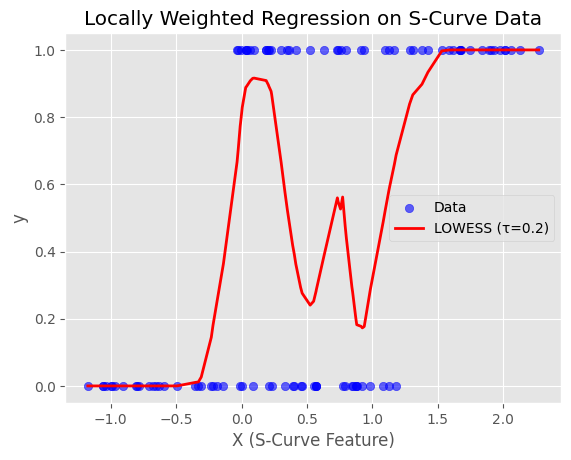

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from statsmodels.nonparametric.smoothers_lowess import lowess

# Generate S-curve dataset
np.random.seed(42)
X, y = make_(n_samples=100, noise=0.1)

# Select one dimension (X[:, 0]) for 2D regression
X_2D = X[:, 0]  # Taking the first feature (removing 3D structure)
y_2D = y        # Keeping y-values

# Sort X for smooth curve plotting
sorted_indices = np.argsort(X_2D)
X_2D_sorted = X_2D[sorted_indices]
y_2D_sorted = y_2D[sorted_indices]

# Apply Locally Weighted Regression (LOWESS)
tau = 0.2  # Smoothing parameter
y_pred = lowess(y_2D_sorted, X_2D_sorted, frac=tau, it=3)[:, 1]  # LOWESS fit

# Plot the original data and LOWESS regression curve
plt.scatter(X_2D_sorted, y_2D_sorted, label="Data", color="blue", alpha=0.6)
plt.plot(X_2D_sorted, y_pred, label=f"LOWESS (τ={tau})", color="red", linewidth=2)
plt.xlabel("X (S-Curve Feature)")
plt.ylabel("y")
plt.title("Locally Weighted Regression on S-Curve Data")
plt.legend()
plt.show()

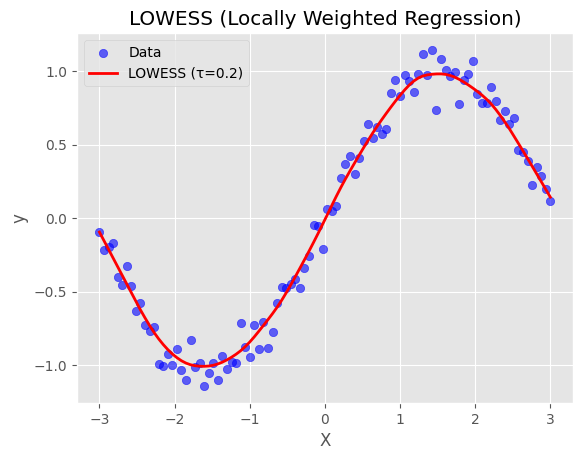

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Generate synthetic data
np.random.seed(42)
X = np.linspace(-3, 3, 100)
y = np.sin(X) + np.random.normal(scale=0.1, size=X.shape)

# Apply LOWESS smoothing
tau = 0.2  # Bandwidth
y_pred = lowess(y, X, frac=tau, it=3)[:, 1]  # frac is equivalent to τ

# Plot the results
plt.scatter(X, y, label="Data", color="blue", alpha=0.6)
plt.plot(X, y_pred, label=f"LOWESS (τ={tau})", color="red", linewidth=2)
plt.xlabel("X")
plt.ylabel("y")
plt.title("LOWESS (Locally Weighted Regression)")
plt.legend()
plt.show()